In [1]:
import gymnasium as gym
import dsrl.offline_safety_gymnasium
import dsrl.infos as dsrl_infos

In [53]:
agent = "Point"
task = "Goal1"
density = 0.5
target_cost = 25.0

# ((low_cost, low_reward), (high_cost, low_reward))
inpaint_ranges = ((0.0, 0.5, 0.0, 0.5), (0.5, 1.0, 0.0, 0.5), (0.25, 0.75, 0.0, 1.0))

In [54]:
offline_task = f"Offline{agent}{task}Gymnasium-v0"

density_key = density if density < 1.0 else 0.5    
density_cfg = dsrl_infos.DENSITY_CFG[offline_task + "_density" + str(density_key)]
    

In [55]:
env = gym.make(offline_task)
env.set_target_cost(target_cost)

In [56]:
data = env.get_dataset()

Loading dataset from /home/returaj/.dsrl/datasets/SafetyPointGoal1Gymnasium-v0-100-2022.hdf5


load datafile: 100%|██████████| 7/7 [00:07<00:00,  1.05s/it]


rmax = 30.07111358642578, rmin = 0.011960059404373169
cmax = 100.0, cmin = 0.0
before filter: traj num = 2022, transitions num = 2022000
after filter: traj num = 1016
rmax = 29.68354034423828, rmin = 0.011960059404373169
cmax = 99.0, cmin = 0.0
before filter: traj num = 696, transitions num = 696000
after filter: traj num = 682
rmax = 29.227222442626953, rmin = 14.769733428955078
cmax = 99.0, cmin = 0.0
before filter: traj num = 526, transitions num = 526000
after filter: traj num = 517


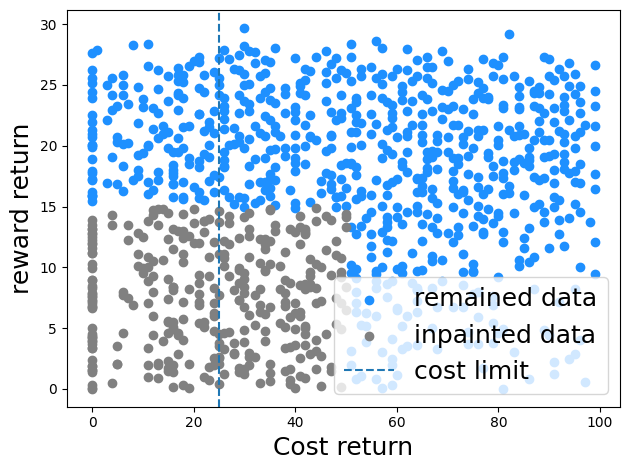

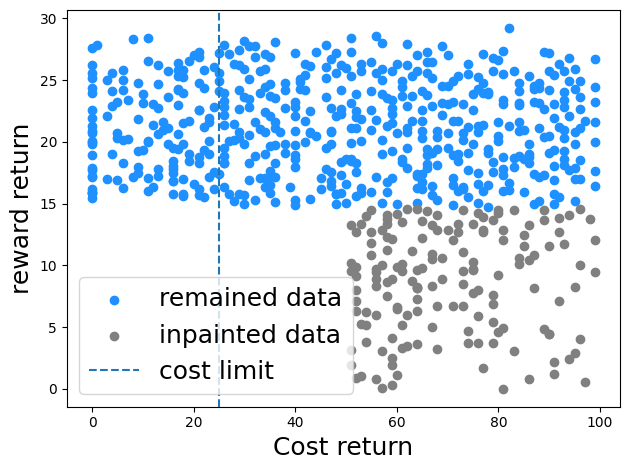

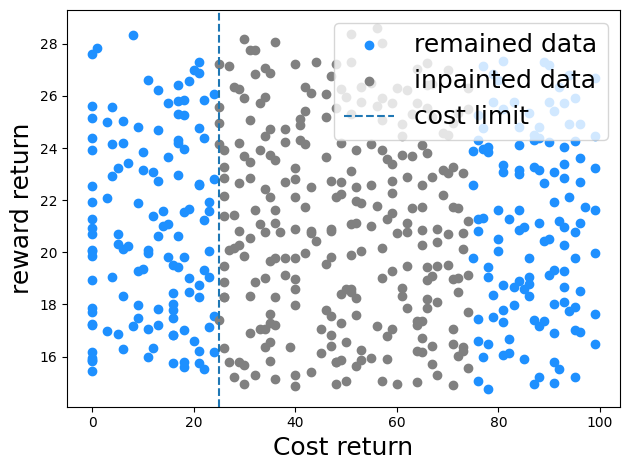

In [57]:
processed_data = data

for inpaint_range in inpaint_ranges:
    processed_data = env.pre_process_data(
        data_dict=processed_data,
        inpaint_ranges=(inpaint_range,),
        density=density,
        cbins=density_cfg["cbins"],
        rbins=density_cfg["rbins"],
        max_npb=density_cfg["max_npb"],
        min_npb=density_cfg["min_npb"]
    )


In [59]:
processed_data["observations"]

(248000, 60)